# Exploratory Data Analysis (EDA) of Movie Dataset: Uncovering Insights and Patterns

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv("movies.csv")

In [150]:
df.sample(4)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
329,The Personals,PG,Comedy,1982,October 1982 (United States),6.7,75.0,Peter Markle,Peter Markle,Bill Schoppert,United States,435000.0,NaN,Blueline Productions,90.0
1730,The Krays,R,Biography,1990,"November 9, 1990 (United States)",6.6,7900.0,Peter Medak,Philip Ridley,Gary Kemp,United Kingdom,NaN,2060847.0,Fugitive TV Productions,115.0
1585,Gross Anatomy,PG-13,Drama,1989,"October 20, 1989 (United States)",6.1,3600.0,Thom Eberhardt,Mark Spragg,Matthew Modine,United States,8500000.0,11604598.0,Hill/Rosenman,109.0
2126,Pure Country,PG,Drama,1992,"October 23, 1992 (United States)",7.0,4100.0,Christopher Cain,Rex McGee,George Strait,United States,10000000.0,15164458.0,Warner Bros.,112.0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Data Cleaning

## Checking for Duplicate Values

In [152]:
df.duplicated().sum()

0

No duplicate value found.

## Checking for Null values

In [153]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Filling the mean values in runtime

In [154]:
mean_runtime = df["runtime"].mean()
mean_runtime

107.2616127348643

In [155]:
df["runtime"].fillna(mean_runtime,inplace = True)

Filling values using Interpolation method 

In [156]:
df["score"].interpolate(method = "linear",inplace = True)

In [157]:
df["votes"].interpolate(method = "linear",inplace = True)

### Deleting the rows with null values

In [158]:
df.dropna(inplace = True)

In [159]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## Now our data is Cleaned

In [160]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Changing the Datatype

Changing datatype of votes (float) to integer

In [161]:
df["votes"] = df["votes"].astype("int")

Also changing datatype of 'budget' and 'gross' to integer

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5422 non-null   object 
 1   rating    5422 non-null   object 
 2   genre     5422 non-null   object 
 3   year      5422 non-null   int64  
 4   released  5422 non-null   object 
 5   score     5422 non-null   float64
 6   votes     5422 non-null   int32  
 7   director  5422 non-null   object 
 8   writer    5422 non-null   object 
 9   star      5422 non-null   object 
 10  country   5422 non-null   object 
 11  budget    5422 non-null   float64
 12  gross     5422 non-null   float64
 13  company   5422 non-null   object 
 14  runtime   5422 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 656.6+ KB


## __________________________________________________________________________

#### Highest Grossing movie.

In [163]:
df_max = df[df['gross'] == df['gross'].max()]
df_max

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0


#### Top 5 highest Grossing Movies ($)

In [164]:
df.sort_values(by = 'gross', ascending = False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


#### Top 5 highest budget Movies

In [165]:
df.sort_values(by = 'budget', ascending = False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0


#### List of all genre

In [166]:
list_of_Genre = df["genre"].unique()
list(list_of_Genre)

['Drama',
 'Adventure',
 'Action',
 'Comedy',
 'Horror',
 'Biography',
 'Crime',
 'Fantasy',
 'Animation',
 'Family',
 'Western',
 'Sci-Fi',
 'Romance',
 'Thriller',
 'Mystery']

#### Number of movies in each Genre.

In [167]:
for i in list_of_Genre:
    print("Movies in ",i," genre are :",len(df[df['genre'] == i]))

Movies in  Drama  genre are : 863
Movies in  Adventure  genre are : 327
Movies in  Action  genre are : 1416
Movies in  Comedy  genre are : 1496
Movies in  Horror  genre are : 251
Movies in  Biography  genre are : 311
Movies in  Crime  genre are : 399
Movies in  Fantasy  genre are : 41
Movies in  Animation  genre are : 277
Movies in  Family  genre are : 4
Movies in  Western  genre are : 2
Movies in  Sci-Fi  genre are : 6
Movies in  Romance  genre are : 5
Movies in  Thriller  genre are : 7
Movies in  Mystery  genre are : 17


In [168]:
df['genre'].describe()

count       5422
unique        15
top       Comedy
freq        1496
Name: genre, dtype: object

#### Director Directed most movies

In [169]:
list_of_directors = df["director"].unique()
list_of_directors

array(['Stanley Kubrick', 'Randal Kleiser', 'Irvin Kershner', ...,
       'Jeff Fowler', 'Chris Sanders', 'Hu Guan'], dtype=object)

In [170]:
for i in list_of_directors:
    print("No. of Movies Directed by ",i," are :",len(df[df['director'] == i]))

No. of Movies Directed by  Stanley Kubrick  are : 2
No. of Movies Directed by  Randal Kleiser  are : 4
No. of Movies Directed by  Irvin Kershner  are : 3
No. of Movies Directed by  Jim Abrahams  are : 6
No. of Movies Directed by  Harold Ramis  are : 9
No. of Movies Directed by  Sean S. Cunningham  are : 2
No. of Movies Directed by  John Landis  are : 12
No. of Movies Directed by  Martin Scorsese  are : 19
No. of Movies Directed by  Richard Lester  are : 3
No. of Movies Directed by  Walter Hill  are : 15
No. of Movies Directed by  Buddy Van Horn  are : 3
No. of Movies Directed by  Jamie Uys  are : 1
No. of Movies Directed by  Robert Altman  are : 11
No. of Movies Directed by  Robert Redford  are : 9
No. of Movies Directed by  Brian De Palma  are : 17
No. of Movies Directed by  Jeannot Szwarc  are : 3
No. of Movies Directed by  Colin Higgins  are : 2
No. of Movies Directed by  John Carpenter  are : 14
No. of Movies Directed by  William Friedkin  are : 9
No. of Movies Directed by  Michael

No. of Movies Directed by  Harry Winer  are : 1
No. of Movies Directed by  John Irvin  are : 3
No. of Movies Directed by  Nelson Shin  are : 1
No. of Movies Directed by  John Carl Buechler  are : 2
No. of Movies Directed by  James Foley  are : 9
No. of Movies Directed by  Spike Lee  are : 17
No. of Movies Directed by  Brian Gibson  are : 3
No. of Movies Directed by  Gary Nelson  are : 1
No. of Movies Directed by  Randa Haines  are : 1
No. of Movies Directed by  Fred Walton  are : 1
No. of Movies Directed by  Roman Polanski  are : 9
No. of Movies Directed by  Richard Pearce  are : 1
No. of Movies Directed by  Trevor Nunn  are : 2
No. of Movies Directed by  Robert Mandel  are : 2
No. of Movies Directed by  Paul Michael Glaser  are : 4
No. of Movies Directed by  Richard Wenk  are : 1
No. of Movies Directed by  Kevin Tenney  are : 2
No. of Movies Directed by  Richard Pryor  are : 1
No. of Movies Directed by  Dick Richards  are : 1
No. of Movies Directed by  Jim Goddard  are : 1
No. of Movi

No. of Movies Directed by  Eugene Levy  are : 1
No. of Movies Directed by  Stanley Tong  are : 3
No. of Movies Directed by  Bruce Robinson  are : 2
No. of Movies Directed by  Alfonso Arau  are : 2
No. of Movies Directed by  Randall Miller  are : 4
No. of Movies Directed by  Bruce A. Evans  are : 2
No. of Movies Directed by  Carroll Ballard  are : 2
No. of Movies Directed by  Stephen Milburn Anderson  are : 1
No. of Movies Directed by  Brian Henson  are : 2
No. of Movies Directed by  Chris Menges  are : 1
No. of Movies Directed by  Stephen Gyllenhaal  are : 2
No. of Movies Directed by  Carl Schenkel  are : 1
No. of Movies Directed by  Keith Gordon  are : 3
No. of Movies Directed by  Marc Rocco  are : 1
No. of Movies Directed by  Martin Bell  are : 1
No. of Movies Directed by  Arne Glimcher  are : 1
No. of Movies Directed by  Billy Crystal  are : 1
No. of Movies Directed by  Ringo Lam  are : 2
No. of Movies Directed by  Gregg Araki  are : 1
No. of Movies Directed by  Tamra Davis  are : 5

No. of Movies Directed by  Peter Hall  are : 1
No. of Movies Directed by  Aaron Norris  are : 1
No. of Movies Directed by  Maria Maggenti  are : 1
No. of Movies Directed by  Nick Gomez  are : 2
No. of Movies Directed by  Preston A. Whitmore II  are : 1
No. of Movies Directed by  Baz Luhrmann  are : 4
No. of Movies Directed by  Cameron Crowe  are : 6
No. of Movies Directed by  Gregory Hoblit  are : 4
No. of Movies Directed by  Wes Anderson  are : 8
No. of Movies Directed by  Lana Wachowski  are : 6
No. of Movies Directed by  Billy Bob Thornton  are : 2
No. of Movies Directed by  Tom Hanks  are : 2
No. of Movies Directed by  Bobby Farrelly  are : 11
No. of Movies Directed by  Jonathan Frakes  are : 4
No. of Movies Directed by  Doug Liman  are : 8
No. of Movies Directed by  Paris Barclay  are : 1
No. of Movies Directed by  Paul Thomas Anderson  are : 8
No. of Movies Directed by  Campbell Scott  are : 1
No. of Movies Directed by  Stuart Baird  are : 3
No. of Movies Directed by  Jason Bloom

No. of Movies Directed by  Rupert Wainwright  are : 2
No. of Movies Directed by  John Bruno  are : 1
No. of Movies Directed by  Bruce McCulloch  are : 1
No. of Movies Directed by  Malcolm D. Lee  are : 6
No. of Movies Directed by  Mic Rodgers  are : 1
No. of Movies Directed by  Risa Bramon Garcia  are : 1
No. of Movies Directed by  Kelly Makin  are : 1
No. of Movies Directed by  Rand Ravich  are : 1
No. of Movies Directed by  Tim Hill  are : 5
No. of Movies Directed by  Stephan Elliott  are : 1
No. of Movies Directed by  Rick Famuyiwa  are : 3
No. of Movies Directed by  Jeff Franklin  are : 1
No. of Movies Directed by  Gary Halvorson  are : 1
No. of Movies Directed by  Michael Corrente  are : 1
No. of Movies Directed by  Mark Tarlov  are : 1
No. of Movies Directed by  Takao Okawara  are : 1
No. of Movies Directed by  Michael Haigney  are : 1
No. of Movies Directed by  Louis Morneau  are : 1
No. of Movies Directed by  Franco Zeffirelli  are : 1
No. of Movies Directed by  Damon Santostef

No. of Movies Directed by  James Wan  are : 9
No. of Movies Directed by  Jonathan Hensleigh  are : 2
No. of Movies Directed by  Eric Bress  are : 1
No. of Movies Directed by  Jared Hess  are : 4
No. of Movies Directed by  Gary Winick  are : 4
No. of Movies Directed by  Paul Haggis  are : 3
No. of Movies Directed by  Paul Greengrass  are : 6
No. of Movies Directed by  Zack Snyder  are : 8
No. of Movies Directed by  Alexander Witt  are : 1
No. of Movies Directed by  Adam McKay  are : 7
No. of Movies Directed by  David S. Goyer  are : 3
No. of Movies Directed by  Shane Carruth  are : 2
No. of Movies Directed by  John Hamburg  are : 3
No. of Movies Directed by  Stephen Hillenburg  are : 1
No. of Movies Directed by  Ethan Coen  are : 7
No. of Movies Directed by  Terry George  are : 2
No. of Movies Directed by  Zach Braff  are : 3
No. of Movies Directed by  Pitof  are : 1
No. of Movies Directed by  Don Mancini  are : 1
No. of Movies Directed by  Kar-Wai Wong  are : 3
No. of Movies Directed b

No. of Movies Directed by  Agnieszka Wojtowicz-Vosloo  are : 1
No. of Movies Directed by  Steve Shill  are : 1
No. of Movies Directed by  Phil Traill  are : 1
No. of Movies Directed by  Peter Cornwell  are : 1
No. of Movies Directed by  Glenn Ficarra  are : 4
No. of Movies Directed by  Scott Sanders  are : 1
No. of Movies Directed by  Kevin Tancharoen  are : 1
No. of Movies Directed by  Ti West  are : 1
No. of Movies Directed by  George Gallo  are : 1
No. of Movies Directed by  Hoyt Yeatman  are : 1
No. of Movies Directed by  Brandon Camp  are : 1
No. of Movies Directed by  Jody Hill  are : 1
No. of Movies Directed by  Daniel Barber  are : 1
No. of Movies Directed by  Jorge Blanco  are : 1
No. of Movies Directed by  Raymond De Felitta  are : 1
No. of Movies Directed by  Anne Fontaine  are : 2
No. of Movies Directed by  Tommy Wirkola  are : 2
No. of Movies Directed by  Oren Moverman  are : 1
No. of Movies Directed by  Tomm Moore  are : 1
No. of Movies Directed by  J Blakeson  are : 2
No

No. of Movies Directed by  Patricia Riggen  are : 2
No. of Movies Directed by  Joachim Trier  are : 1
No. of Movies Directed by  Travis Cluff  are : 1
No. of Movies Directed by  John Maclean  are : 1
No. of Movies Directed by  Jerry Jameson  are : 1
No. of Movies Directed by  Michael Showalter  are : 2
No. of Movies Directed by  Dan Fogelman  are : 2
No. of Movies Directed by  Daniel Lee  are : 1
No. of Movies Directed by  Tim Miller  are : 2
No. of Movies Directed by  Thea Sharrock  are : 1
No. of Movies Directed by  Matt Ross  are : 1
No. of Movies Directed by  Cedric Nicolas-Troyan  are : 1
No. of Movies Directed by  Alessandro Carloni  are : 1
No. of Movies Directed by  Anna Foerster  are : 1
No. of Movies Directed by  Greg Tiernan  are : 2
No. of Movies Directed by  Barry Jenkins  are : 2
No. of Movies Directed by  Dan Trachtenberg  are : 1
No. of Movies Directed by  Garth Davis  are : 1
No. of Movies Directed by  David F. Sandberg  are : 3
No. of Movies Directed by  Deon Taylor  

### Adding new columns based on Scores

In [171]:
quadrants = ['Not Recommended', 'Decent', 'Great', 'Masterpiece']

In [172]:
df['Quadrant'] = pd.cut(df['score'], bins=[0, 2.5, 5.0, 7.5, 10], labels=quadrants)

In [173]:
quadrant_counts = df['Quadrant'].value_counts().reindex(quadrants, fill_value=0)
quadrant_counts

Not Recommended      14
Decent              412
Great              4448
Masterpiece         548
Name: Quadrant, dtype: int64

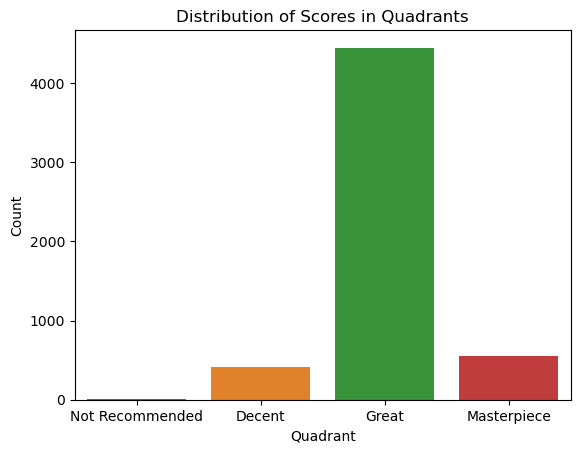

In [174]:
sns.barplot(x = quadrant_counts.index,y = quadrant_counts.values)
plt.xlabel('Quadrant')
plt.ylabel('Count')
plt.title('Distribution of Scores in Quadrants')
plt.show()

### Rating and Movies

In [175]:
df['rating'].unique()

array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13',
       'Unrated', 'X', 'TV-MA'], dtype=object)

In [176]:
rating_data = df.groupby(by='rating').count()['name']
print(rating_data.index)
print(rating_data.values)

Index(['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA',
       'Unrated', 'X'],
      dtype='object', name='rating')
[   1  111   12   44  907 1730 2597    2   17    1]


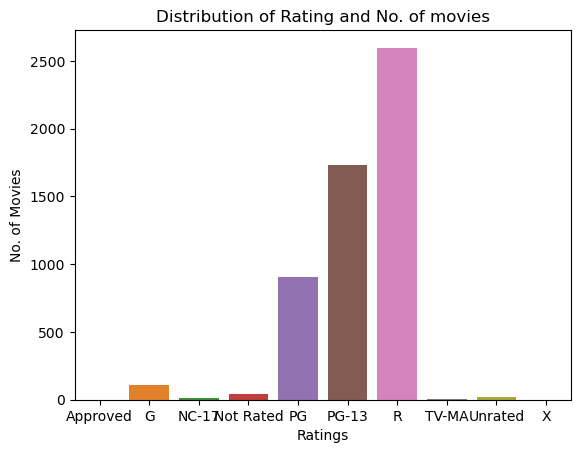

In [177]:
sns.barplot(x = rating_data.index, y = rating_data.values)
plt.xlabel('Ratings')
plt.ylabel('No. of Movies')
plt.title('Distribution of Rating and No. of movies')
plt.show()

### List of Companies according to there gross profit

In [178]:
df_gr = df.groupby('company').sum()['gross'].sort_values(ascending = False)

C:\Users\achin\AppData\Local\Temp\ipykernel_9444\2307522340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gr = df.groupby('company').sum()['gross'].sort_values(ascending = False)


These are the top 10 movies companies with highest Profit grossing.

In [179]:
companies_data = df_gr.head(10)

In [180]:
companies_data

company
Warner Bros.             5.461096e+10
Universal Pictures       5.124111e+10
Columbia Pictures        4.235643e+10
Paramount Pictures       4.002170e+10
Twentieth Century Fox    3.954257e+10
Walt Disney Pictures     3.583365e+10
New Line Cinema          1.961285e+10
Marvel Studios           1.506559e+10
DreamWorks Animation     1.187361e+10
Dreamworks Pictures      1.159381e+10
Name: gross, dtype: float64

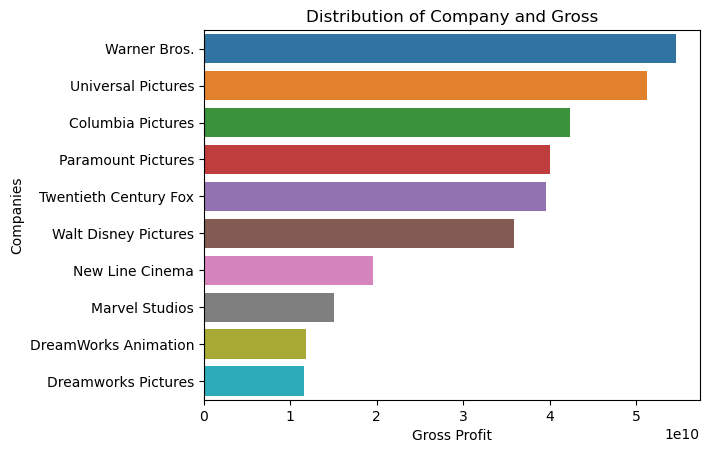

In [181]:
sns.barplot(y = companies_data.index, x = companies_data.values)
plt.ylabel('Companies')
plt.xlabel('Gross Profit')
plt.title('Distribution of Company and Gross')
plt.show()

In [182]:
companies_data.values

array([5.46109600e+10, 5.12411054e+10, 4.23564302e+10, 4.00217047e+10,
       3.95425733e+10, 3.58336507e+10, 1.96128512e+10, 1.50655924e+10,
       1.18736129e+10, 1.15938077e+10])

### Runtime of movies (minutes)

In [183]:
df['runtime'].describe()

count    5422.000000
mean      108.152575
std        18.114031
min        63.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       271.000000
Name: runtime, dtype: float64

### Movie with maximum Runtime

In [184]:
df[df['runtime'] == df['runtime'].max()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Quadrant
2280,Gettysburg,PG,Drama,1993,"October 8, 1993 (United States)",7.6,27000,Ron Maxwell,Michael Shaara,Tom Berenger,United States,25000000.0,10769960.0,TriStar Television,271.0,Masterpiece


### Movie with minimum Runtime

In [185]:
df[df['runtime'] == df['runtime'].min()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Quadrant
5985,Winnie the Pooh,G,Animation,2011,"July 15, 2011 (United States)",7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000.0,49871429.0,Walt Disney Pictures,63.0,Great


## Countries

In [186]:
df['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Italy', 'South Korea', 'Sweden', 'Spain',
       'Hong Kong', 'Mexico', 'Switzerland', 'France', 'New Zealand',
       'Japan', 'Yugoslavia', 'Ireland', 'Germany', 'Austria', 'Portugal',
       'China', 'Taiwan', 'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Iran', 'Czech Republic',
       'Denmark', 'Jamaica', 'Brazil', 'Aruba', 'Argentina', 'India',
       'Netherlands', 'Colombia', 'Norway', 'Israel', 'Belgium',
       'United Arab Emirates', 'Indonesia', 'Hungary', 'Kenya', 'Iceland',
       'Chile', 'Finland', 'Panama', 'Malta', 'Lebanon', 'Thailand'],
      dtype=object)

In [187]:
df_country = df.groupby('country').count()['name'].sort_values(ascending = False)

In [188]:
top_country = df_country.head(10)

Text(0.5, 1.0, 'Countries with highest no. of movies')

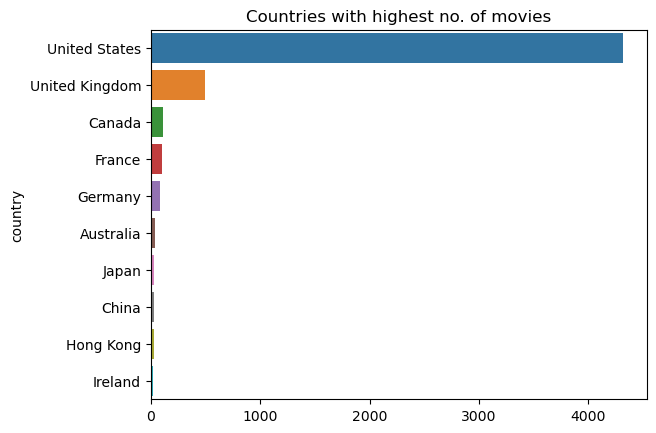

In [189]:
sns.barplot(y = top_country.index, x=top_country.values)
plt.title("Countries with highest no. of movies")

In [190]:
df['G/B ratio'] = df['gross']/df['budget']

In [191]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Quadrant,G/B ratio
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Masterpiece,2.473620
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Great,13.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Masterpiece,29.909726
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Masterpiece,23.843868
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Great,6.641057


In [192]:
df['G/B ratio'].max()

12890.386666666667

In [193]:
df['profit'] = df['gross'] -  df['budget']

In [194]:
df['profit'].sort_values(ascending = False)

5445    2.610246e+09
7445    2.441501e+09
3045    2.001647e+09
6663    1.824522e+09
7244    1.727360e+09
            ...     
2700   -8.798268e+07
6023   -9.114436e+07
4218   -9.289603e+07
3485   -9.830110e+07
7465   -1.580311e+08
Name: profit, Length: 5422, dtype: float64

### Top 5 movies with highest profit

In [195]:
df.sort_values(by = 'profit', ascending = False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Quadrant,G/B ratio,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Masterpiece,12.013697,2.610246e+09
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Masterpiece,7.858150,2.441501e+09
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Masterpiece,11.008236,2.001647e+09
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Masterpiece,8.447027,1.824522e+09
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Masterpiece,6.381183,1.727360e+09


### Top 5 movies with Lowest profit

In [196]:
df.sort_values(by = 'profit', ascending = True).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Quadrant,G/B ratio,profit
7465,The Irishman,R,Biography,2019,"November 27, 2019 (United States)",7.8,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000.0,968853.0,Tribeca Productions,209.0,Masterpiece,0.006093,-158031147.0
3485,The 13th Warrior,R,Action,1999,"August 27, 1999 (United States)",6.6,119000,John McTiernan,Michael Crichton,Antonio Banderas,United States,160000000.0,61698899.0,Touchstone Pictures,102.0,Great,0.385618,-98301101.0
4218,The Adventures of Pluto Nash,PG-13,Action,2002,"August 16, 2002 (United States)",3.8,25000,Ron Underwood,Neil Cuthbert,Eddie Murphy,United States,100000000.0,7103973.0,Castle Rock Entertainment,95.0,Decent,0.071040,-92896027.0
6023,Jin ling shi san chai,R,Drama,2011,"December 16, 2011 (China)",7.6,51000,Yimou Zhang,Heng Liu,Christian Bale,China,94000000.0,2855644.0,Beijing New Picture Film,146.0,Masterpiece,0.030379,-91144356.0
2700,Cutthroat Island,PG-13,Action,1995,"December 22, 1995 (United States)",5.7,27000,Renny Harlin,Michael Frost Beckner,Geena Davis,France,98000000.0,10017322.0,Beckner/Gorman Productions,124.0,Great,0.102218,-87982678.0


##  Data visualization

### Scatter Plot of Budget vs. Gross

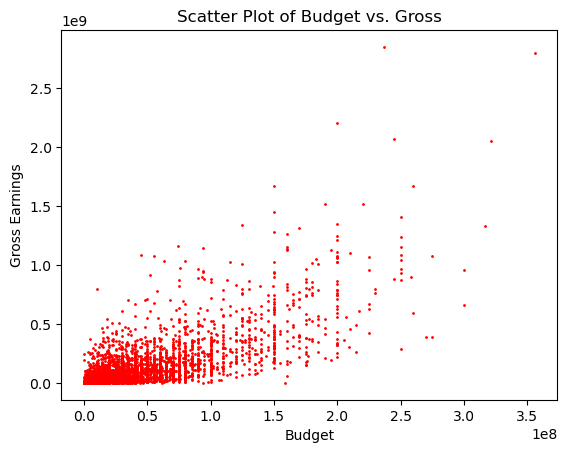

In [197]:
plt.scatter(df['budget'], df['gross'],s = 1,c='red')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.title('Scatter Plot of Budget vs. Gross')
plt.show()


### Distribution of Movie Ratings

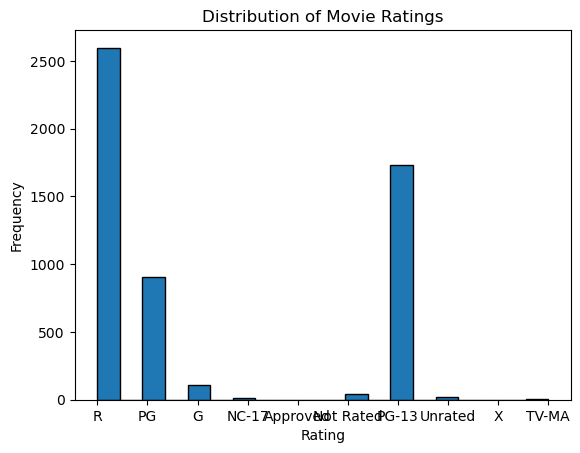

In [198]:
plt.hist(df['rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

### Scatter Plot: Runtime vs. Rating

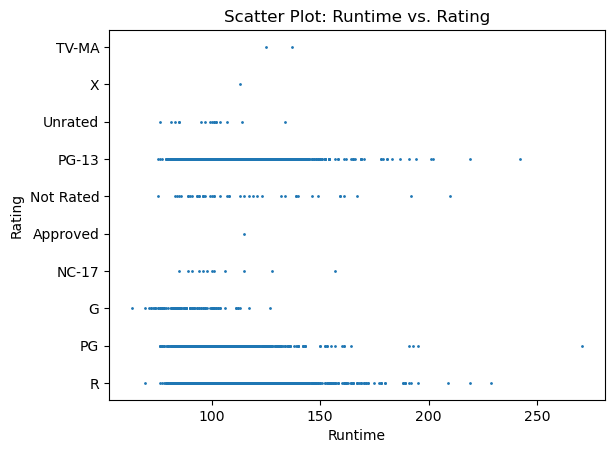

In [199]:
plt.scatter(df['runtime'], df['rating'],s = 1)
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('Scatter Plot: Runtime vs. Rating')
plt.show()

### BAr Plot: Rating vs. Number of Votes

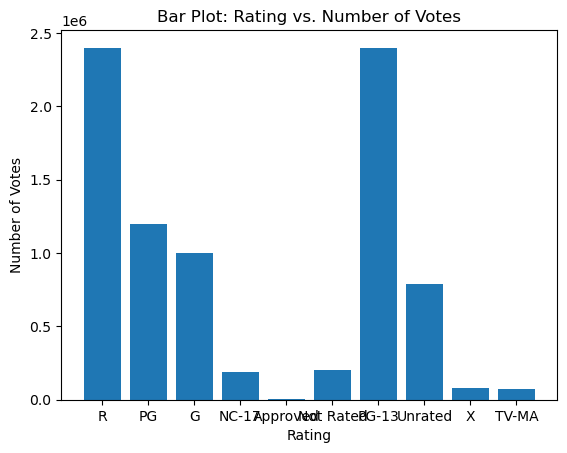

In [205]:
plt.bar(df['rating'], df['votes'])
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Bar Plot: Rating vs. Number of Votes')
plt.show()

### Scatter Plot: Rating vs. Gross Earnings

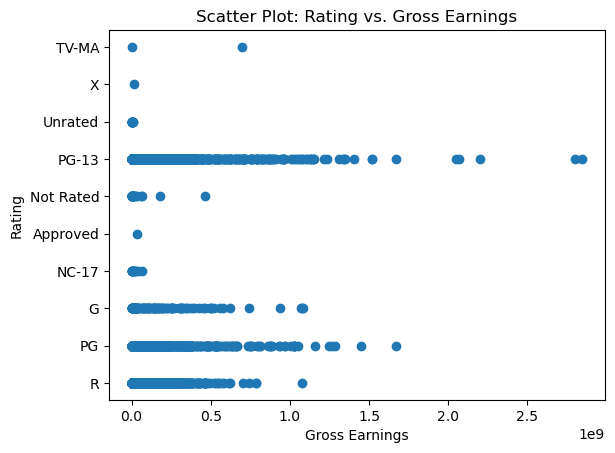

In [201]:
plt.scatter(y = df['rating'], x =df['gross'])
plt.ylabel('Rating')
plt.xlabel('Gross Earnings')
plt.title('Scatter Plot: Rating vs. Gross Earnings')
plt.show()

### Violin Plot for Budget by Genre

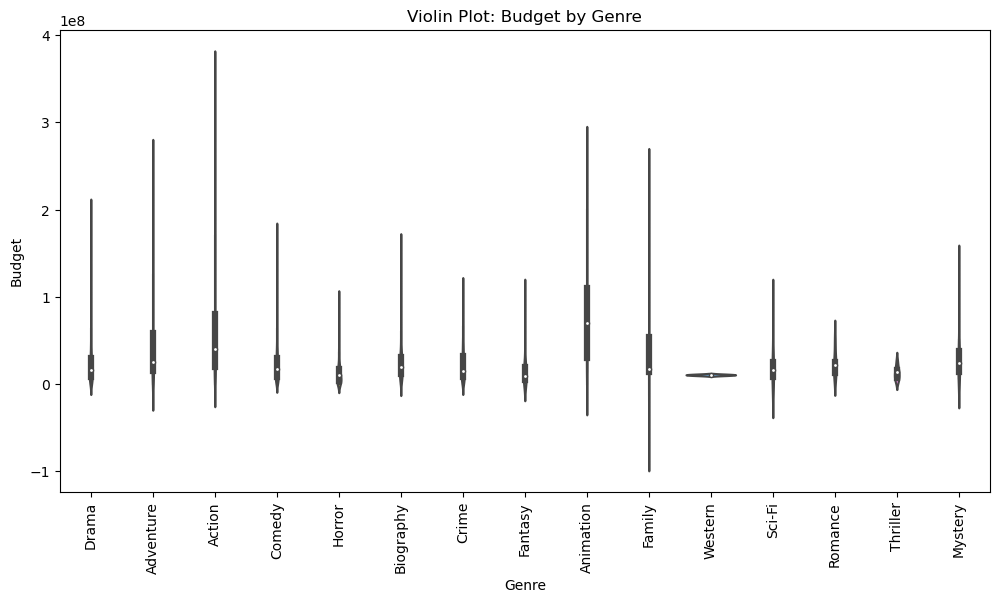

In [202]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='budget', data=df)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Violin Plot: Budget by Genre')
plt.xticks(rotation=90)
plt.show()


### Heatmap to visualize the correlation matrix

C:\Users\achin\AppData\Local\Temp\ipykernel_9444\2902235350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


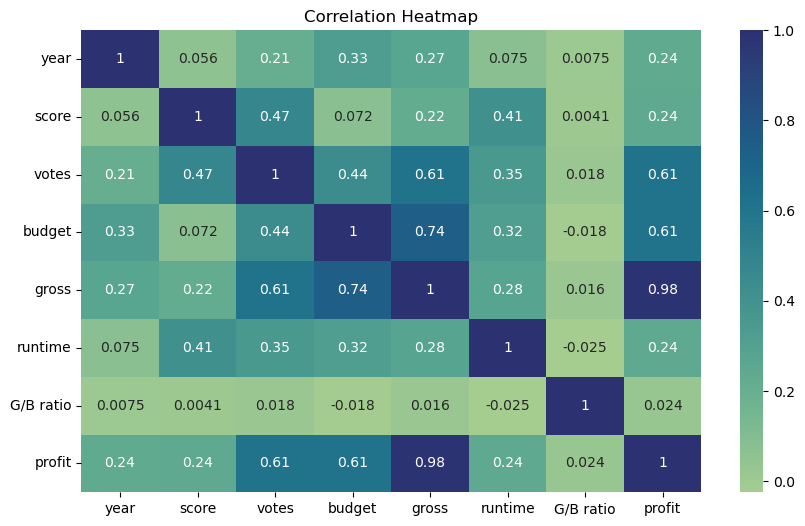

In [203]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

Exploratory Data Analysis has provided valuable insights into the dataset, helping us uncover patterns and relationships within the movie industry. These findings can inform decision-making processes and further analysis, demonstrating the power of data-driven exploration in gaining a deeper understanding of the subject matter. EDA serves as a crucial first step in extracting actionable knowledge from data, and it lays the groundwork for more advanced analytics and informed decision-making.

#### Thankyou.